Epoch 0, Loss: 1.603925
Epoch 100, Loss: 0.478433
Epoch 200, Loss: 0.310057
Epoch 300, Loss: 0.174856
Epoch 400, Loss: 0.128388
Epoch 500, Loss: 0.116782
Epoch 600, Loss: 0.109884
Epoch 700, Loss: 0.103429
Epoch 800, Loss: 0.096662
Epoch 900, Loss: 0.089202
Epoch 1000, Loss: 0.080581
Epoch 1100, Loss: 0.070780
Epoch 1200, Loss: 0.060259
Epoch 1300, Loss: 0.049882
Epoch 1400, Loss: 0.040596
Epoch 1500, Loss: 0.033155
Epoch 1600, Loss: 0.027580
Epoch 1700, Loss: 0.023449
Epoch 1800, Loss: 0.020209
Epoch 1900, Loss: 0.017548
Epoch 2000, Loss: 0.015320
Epoch 2100, Loss: 0.013424
Epoch 2200, Loss: 0.011825
Epoch 2300, Loss: 0.010492
Epoch 2400, Loss: 0.009387
Epoch 2500, Loss: 0.008475
Epoch 2600, Loss: 0.007726
Epoch 2700, Loss: 0.007120
Epoch 2800, Loss: 0.006624
Epoch 2900, Loss: 0.006215
Epoch 3000, Loss: 0.005872
Epoch 3100, Loss: 0.005577
Epoch 3200, Loss: 0.005324
Epoch 3300, Loss: 0.005105
Epoch 3400, Loss: 0.004912
Epoch 3500, Loss: 0.004744
Epoch 3600, Loss: 0.004594
Epoch 3700, L

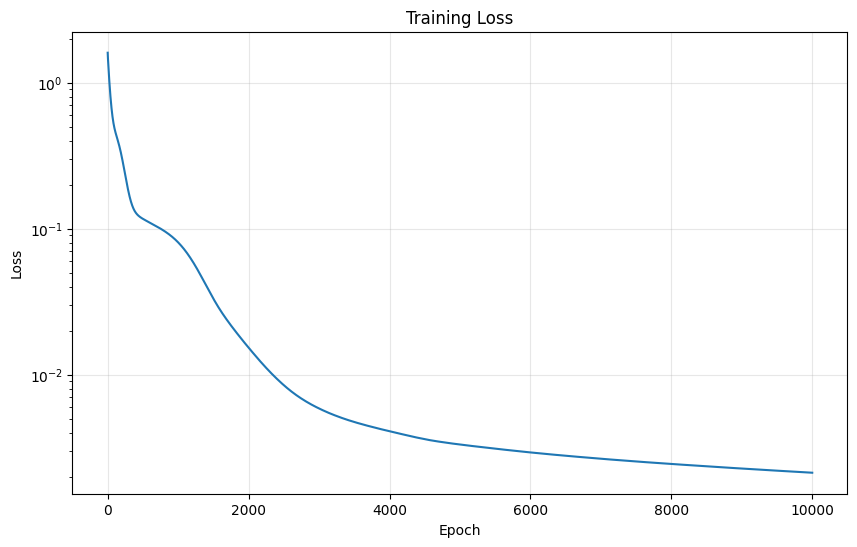


Test: [0.5, 0.3]
Output: [-0.37475568  1.1795194 ]
Expected: [-0.19999999999999996, 1.2]
Error: [0.17475568 0.02048059]


In [4]:
from tinygrad import Tensor, nn
from tinygrad.nn import optim
import numpy as np
import matplotlib.pyplot as plt


Tensor.training = True

# Generate data
np.random.seed(42)
q1 = np.random.uniform(-1, 1, 1000).astype(np.float32)
q2 = np.random.uniform(-1, 1, 1000).astype(np.float32)


# Target function
# X1 = q1 + q2 - 1
# X2 = q1 - q2 + 1

X1 = q1 + q2**2 - 1
X2 = q1 - q2 + 1

# Prepare data as tensors
X_train = Tensor(np.stack([q1, q2], axis=1))
y_train = Tensor(np.stack([X1, X2], axis=1))

# Define network
class TinyNet:
    def __init__(self):
        self.l1 = nn.Linear(2, 8)
        self.l2 = nn.Linear(8, 8)
        self.l3 = nn.Linear(8, 8)
        self.l4 = nn.Linear(8, 2)
    
    def __call__(self, x):
        x = self.l1(x).relu()
        x = self.l2(x).relu()
        x = self.l3(x).relu()
        x = self.l4(x)
        return x

# Initialize model
model = TinyNet()

# Get parameters for optimizer
params = [model.l1.weight, model.l1.bias, 
          model.l2.weight, model.l2.bias,
          model.l3.weight, model.l3.bias,
          model.l4.weight, model.l4.bias]

# Use tinygrad's optimizer
optimizer = optim.SGD(params, lr=0.01)

# Training loop
epochs = 10000
loss_history = []

for epoch in range(epochs):
    # Forward pass
    output = model(X_train)
    
    # Loss (MSE)
    loss = ((output - y_train) ** 2).mean()
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    loss_history.append(loss.numpy())
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.numpy():.6f}")

# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()

# Test
test_input = Tensor([[0.5, 0.3]])
output = model(test_input)
expected = [0.5 + 0.3 - 1, 0.5 - 0.3 + 1]

print(f"\nTest: [0.5, 0.3]")
print(f"Output: {output.numpy()[0]}")
print(f"Expected: {expected}")
print(f"Error: {np.abs(output.numpy()[0] - expected)}")